In [220]:
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import datetime as dt
import pysal
# import geoplot

In [148]:
def convertGeometries(df):
    for i in list(df.index):
        geom_type = df.loc[i, 'GeometryType']
        geom = None
        if geom_type == 'Point':
            geom =shapely.geometry.Point(df.loc[i,'Coordinates'])
        elif geom_type == 'GeometryCollection':
            if df.loc[i,'Coordinates'][0] == df.loc[i,'Coordinates'][-1]:
                geom = shapely.geometry.Polygon(df.loc[i,'Coordinates'])
            else:
                geom = shapely.geometry.LineString(df.loc[i,'Coordinates'])
        df.loc[i, 'geometry'] = geom

In [143]:
df = pd.read_csv('https://raw.githubusercontent.com/robisoniv/navwarning-analysis/master/CleanedData.csv')
df = df.sample(frac=0.05)
df = df.drop(columns=['Unnamed: 0'])
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['BroadcastingDate'] = pd.to_datetime(df['BroadcastingDate'])
df['Coordinates'] = df['Coordinates'].apply(lambda c: eval(c))
convertGeometries(df)

In [150]:
df.head()

,Area,Chart,Message,Authority,Date,StartDate,EndDate,BroadcastingDate,GeometryType,geometry,Coordinates
10142,NORTH SEA./SCOTLAND./DNC 20.,35010.,ST. ABBS HEAD LIGHT 55-55.0N 002-08.3W RANGE ...,WZ,2017-07-05 00:00:00,2018-06-29,2018-06-29,2018-06-29,Point,POINT Z (-2.138334 55.916667 0),"[(-2.138334, 55.916667, 0.0)]"
21984,PHILIPPINE SEA./DNC 12.,NO CHART,DISTRESS SIGNAL RECEIVED ON 406 MHZ FROM VESS...,JAPAN COAST GUARD,2018-07-22 00:00:00,2018-07-24,2018-07-24,2018-07-24,Point,POINT Z (136.736945 28.263889 0),"[(136.736945, 28.263889, 0.0)]"
29556,NORTH SEA./ENGLAND-SOUTHEAST COAST./DNC 20.,37140.,UNEXPLODED ORDNANCE IN 52-07.4N 001-50.4E.//,WZ,2018-07-04 00:00:00,2018-08-10,2018-08-10,2018-08-10,Point,POINT Z (1.84 52.123334 0),"[(1.84, 52.123334, 0.0)]"
34133,WESTERN SOUTH ATLANTIC. /BRAZIL-NORTHEAST COAS...,24220.,1. NORTH BANCO INGLES BREAKWATER LIGHT 08-0...,NAVAREA V COASTAL E,2018-07-31 00:00:00,2018-08-21,2019-01-28,2018-08-21,Point,POINT Z (-34.85 -8.045 0),"[(-34.85, -8.045, 0.0)]"
36157,BAY OF CAMPECHE./MEXICO.,28310.,BOC9 ODAS BUOY ESTABLISHED IN 19-43-57N 096-23...,MEXICO IV,2018-08-17 00:00:00,2018-08-24,2018-08-24,2018-08-24,Point,POINT Z (-96.3925 19.7325 0),"[(-96.3925, 19.7325, 0.0)]"


In [152]:
gdf = gpd.GeoDataFrame(df)
gdf['centroid'] = gdf['geometry'].centroid
for i in list(gdf.index):
    gdf.loc[i, 'lon_centroid'] = list(gdf.loc[i, 'centroid'].coords[0])[0]
    gdf.loc[i, 'lat_centroid'] = list(gdf.loc[i, 'centroid'].coords[0])[1]

In [222]:
gdf.head()

,Area,Chart,Message,Authority,Date,StartDate,EndDate,BroadcastingDate,GeometryType,geometry,Coordinates,centroid,lon_centroid,lat_centroid
10142,NORTH SEA./SCOTLAND./DNC 20.,35010.,ST. ABBS HEAD LIGHT 55-55.0N 002-08.3W RANGE ...,WZ,2017-07-05 00:00:00,2018-06-29,2018-06-29,2018-06-29,Point,POINT Z (-2.138334 55.916667 0),"[(-2.138334, 55.916667, 0.0)]",POINT (-2.138334 55.916667),-2.138334,55.916667
21984,PHILIPPINE SEA./DNC 12.,NO CHART,DISTRESS SIGNAL RECEIVED ON 406 MHZ FROM VESS...,JAPAN COAST GUARD,2018-07-22 00:00:00,2018-07-24,2018-07-24,2018-07-24,Point,POINT Z (136.736945 28.263889 0),"[(136.736945, 28.263889, 0.0)]",POINT (136.736945 28.263889),136.736945,28.263889
29556,NORTH SEA./ENGLAND-SOUTHEAST COAST./DNC 20.,37140.,UNEXPLODED ORDNANCE IN 52-07.4N 001-50.4E.//,WZ,2018-07-04 00:00:00,2018-08-10,2018-08-10,2018-08-10,Point,POINT Z (1.84 52.123334 0),"[(1.84, 52.123334, 0.0)]",POINT (1.84 52.123334),1.840000,52.123334
34133,WESTERN SOUTH ATLANTIC. /BRAZIL-NORTHEAST COAS...,24220.,1. NORTH BANCO INGLES BREAKWATER LIGHT 08-0...,NAVAREA V COASTAL E,2018-07-31 00:00:00,2018-08-21,2019-01-28,2018-08-21,Point,POINT Z (-34.85 -8.045 0),"[(-34.85, -8.045, 0.0)]",POINT (-34.85 -8.045),-34.850000,-8.045000
36157,BAY OF CAMPECHE./MEXICO.,28310.,BOC9 ODAS BUOY ESTABLISHED IN 19-43-57N 096-23...,MEXICO IV,2018-08-17 00:00:00,2018-08-24,2018-08-24,2018-08-24,Point,POINT Z (-96.3925 19.7325 0),"[(-96.3925, 19.7325, 0.0)]",POINT (-96.3925 19.7325),-96.392500,19.732500


In [227]:
cols = ['Area', 'Chart', 'Message', 'Authority', 'Date', 'StartDate',
       'EndDate', 'BroadcastingDate', 'GeometryType',
       'Coordinates', 'lon_centroid', 'lat_centroid']
gdf[cols].to_csv('gdf-sample.csv')

In [226]:
type(gdf[cols])

pandas.core.frame.DataFrame

In [154]:
# Let's look at distribution of daily events

df_daily_start = gdf.groupby('StartDate').count()[['Area']].rename(columns={'Area': 'count'})
df_daily_broadcast = gdf.groupby('BroadcastingDate').count()[['Area']].rename(columns={'Area': 'count'})
df_daily_end = gdf.groupby('EndDate').count()[['Area']].rename(columns={'Area': 'count'})

In [155]:
df_daily_end.describe()

,count
count,149.000000
mean,18.107383
std,14.942295
min,1.000000
25%,3.000000
50%,21.000000
75%,31.000000
max,64.000000


In [216]:
def plotDailyFigures(df):
    plt.figure(figsize=(10,15))
    plt.subplot(3,1,1)
    plt.scatter(df.index, df['count'])
    plt.subplot(3,1,2)
    plt.hist(df['count'], bins=15)
    plt.subplot(3,1,3)
    plt.plot(df['count'].rolling(7).sum())

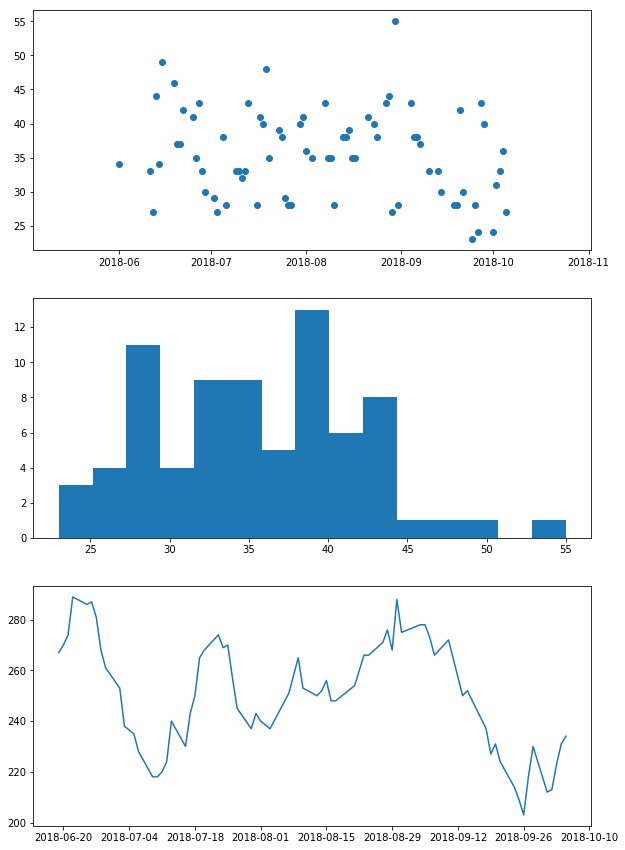

In [217]:
plotDailyFigures(df_daily_broadcast)

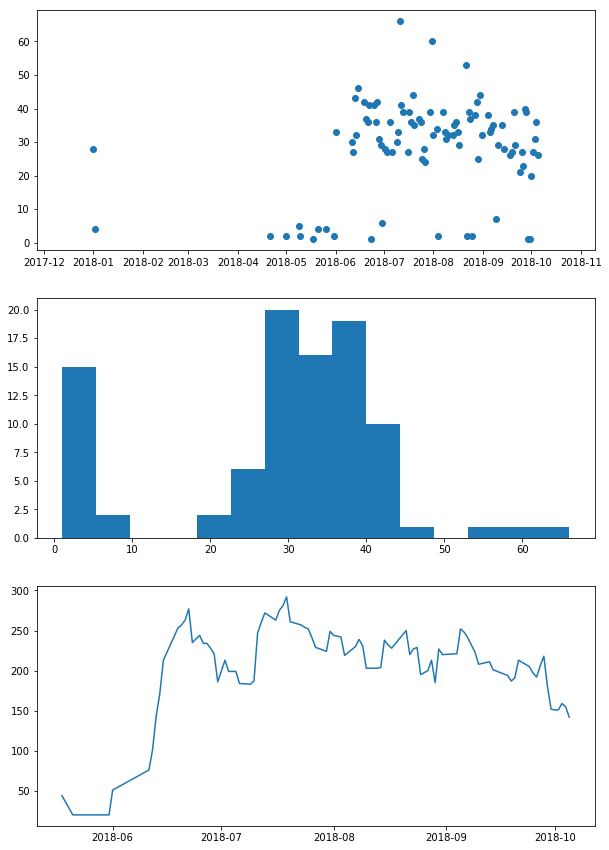

In [218]:
plotDailyFigures(df_daily_start)

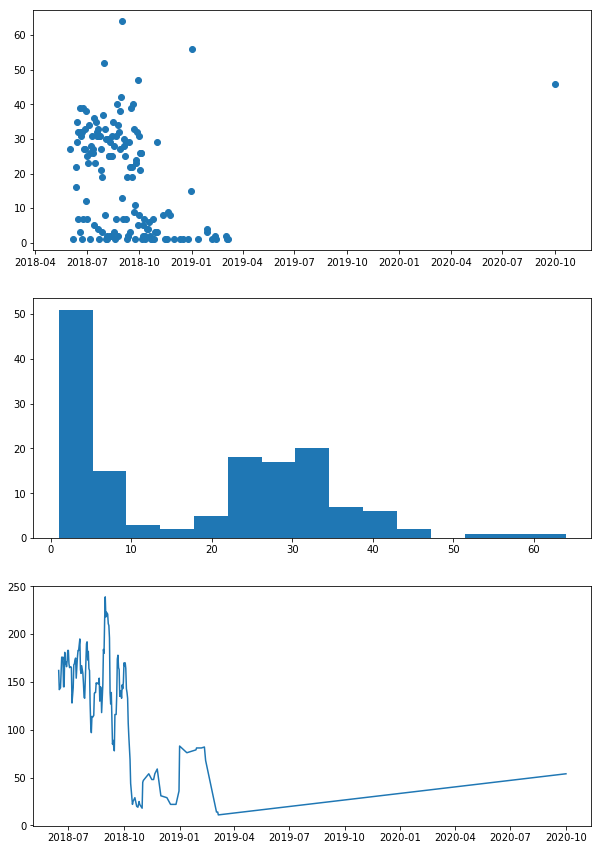

In [219]:
plotDailyFigures(df_daily_end)

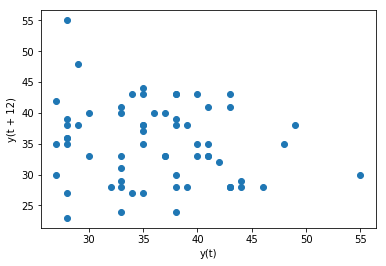

In [160]:
pd.plotting.lag_plot(df_daily_broadcast, lag=12)

In [161]:
def calculateAutocorrelation(lags=50):
    df_tmp = pd.DataFrame(columns=['start', 'broadcasting', 'end']) 
    for lag in range(lags):
        df_tmp.loc[lag,'broadcasting'] = df_daily_broadcast['count'].autocorr(lag=lag)
        df_tmp.loc[lag,'start'] = df_daily_start['count'].autocorr(lag=lag)
        df_tmp.loc[lag,'end'] = df_daily_end['count'].autocorr(lag=lag)

    return df_tmp

In [162]:
df_autocorrelation = calculateAutocorrelation(100)

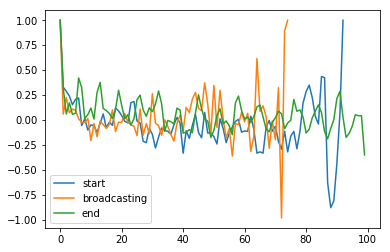

In [163]:
df_autocorrelation.plot()

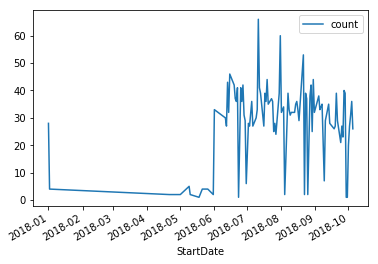

In [164]:
df_daily_start.plot()

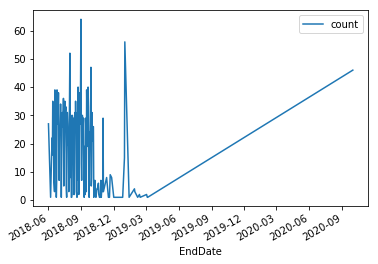

In [165]:
df_daily_end.plot()

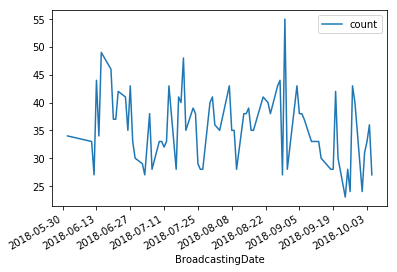

In [166]:
df_daily_broadcast.plot()

In [167]:
# Do we do an ACF or PACF analysis here? Can't quite tell ....
# Or ARIMA?

In [168]:
# Getis G
points = gdf['centroid'].values

In [169]:
go = True
centroids = []
for i in gdf.iterrows():
    lat = i[1].lat_centroid
    lon = i[1].lon_centroid
    centroids.append((lon, lat))


In [190]:
# The weights matrix with a threshold of 1.0 (unit - i.e. decimal degree)
# This parameter needs investigation. Also, we should be using Haversine rather than Euclidean
# distance unless we reproject the coordinates into azimuthal equidistant, I think

w = pysal.weights.DistanceBand(centroids, threshold=10.0)
w.transform = 'B'

/Users/iv/anaconda3/envs/TEST/lib/python2.7/site-packages/pysal/weights/weights.py:189: UserWarning: There are 44 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/Users/iv/anaconda3/envs/TEST/lib/python2.7/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 57, 120, 198, 206, 385, 397, 406, 411, 518, 610, 698, 1025, 1095, 1101, 1155, 1184, 1204, 1254, 1291, 1330, 1402, 1466, 1555, 1607, 1662, 1757, 1857, 1873, 1926, 1974, 2030, 2048, 2082, 2115, 2210, 2221, 2258, 2264, 2360, 2424, 2467, 2473, 2485, 2556
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


In [191]:
y = np.ones(len(centroids))

In [195]:
g = pysal.esda.getisord.G(y, w)
moransi = pysal.esda.moran.Moran(y,w)

print("Getis Ord G :", g.G)
print("Getis Ord p :", g.p_norm)
print("Moran's I   :", moransi.I)
print("Moran's I p :", moransi.p_norm)

# Resources:
# https://pysal.readthedocs.io/en/dev/_modules/pysal/esda/getisord.html#G
# https://esda.readthedocs.io/en/latest/generated/esda.Moran.html#esda.Moran
#

('Getis Ord G :', 0.04693763737705981)
('Getis Ord p :', 0.5)
("Moran's I   :", nan)
("Moran's I p :", nan)


In [196]:
gdf

,Area,Chart,Message,Authority,Date,StartDate,EndDate,BroadcastingDate,GeometryType,geometry,Coordinates,centroid,lon_centroid,lat_centroid
10142,NORTH SEA./SCOTLAND./DNC 20.,35010.,ST. ABBS HEAD LIGHT 55-55.0N 002-08.3W RANGE ...,WZ,2017-07-05 00:00:00,2018-06-29,2018-06-29,2018-06-29,Point,POINT Z (-2.138334 55.916667 0),"[(-2.138334, 55.916667, 0.0)]",POINT (-2.138334 55.916667),-2.138334,55.916667
21984,PHILIPPINE SEA./DNC 12.,NO CHART,DISTRESS SIGNAL RECEIVED ON 406 MHZ FROM VESS...,JAPAN COAST GUARD,2018-07-22 00:00:00,2018-07-24,2018-07-24,2018-07-24,Point,POINT Z (136.736945 28.263889 0),"[(136.736945, 28.263889, 0.0)]",POINT (136.736945 28.263889),136.736945,28.263889
29556,NORTH SEA./ENGLAND-SOUTHEAST COAST./DNC 20.,37140.,UNEXPLODED ORDNANCE IN 52-07.4N 001-50.4E.//,WZ,2018-07-04 00:00:00,2018-08-10,2018-08-10,2018-08-10,Point,POINT Z (1.84 52.123334 0),"[(1.84, 52.123334, 0.0)]",POINT (1.84 52.123334),1.840000,52.123334
34133,WESTERN SOUTH ATLANTIC. /BRAZIL-NORTHEAST COAS...,24220.,1. NORTH BANCO INGLES BREAKWATER LIGHT 08-0...,NAVAREA V COASTAL E,2018-07-31 00:00:00,2018-08-21,2019-01-28,2018-08-21,Point,POINT Z (-34.85 -8.045 0),"[(-34.85, -8.045, 0.0)]",POINT (-34.85 -8.045),-34.850000,-8.045000
36157,BAY OF CAMPECHE./MEXICO.,28310.,BOC9 ODAS BUOY ESTABLISHED IN 19-43-57N 096-23...,MEXICO IV,2018-08-17 00:00:00,2018-08-24,2018-08-24,2018-08-24,Point,POINT Z (-96.3925 19.7325 0),"[(-96.3925, 19.7325, 0.0)]",POINT (-96.3925 19.7325),-96.392500,19.732500
38893,TARTAR STRAIT./RUSSIA./SAKHALIN./DNC 24.,NO CHART,1. CABLE OPERATIONS IN PROGRESS UNTIL 30 AUG ...,NAVAREA XIII,2018-08-04 00:00:00,2018-08-30,2018-08-31,2018-08-30,GeometryCollection,"POLYGON Z ((140.311667 49.063056 0, 140.312778...","[(140.311667, 49.063056, 0.0), (140.312778, 49...",POINT (141.2561905054081 49.04410406239071),141.256191,49.044104
19831,WESTERN NORTH PACIFIC. /YELLOW SEA./CHINA. /DN...,NO CHART,DISTRESS SIGNALS RECEIVED ON 406 MHZ AT 18003...,JAPAN COAST GUARD,2018-07-18 00:00:00,2018-07-19,2018-07-19,2018-07-19,Point,POINT Z (149.890834 31.423889 0),"[(149.890834, 31.423889, 0.0)]",POINT (149.890834 31.423889),149.890834,31.423889
33129,GOLFO DE CALIFORNIA./MEXICO.,NO CHART,1. HAZARDOUS OPERATIONS 11 THRU 21 AUG IN A...,MEXICO XII,2018-08-06 00:00:00,2018-08-16,2018-08-22,2018-08-16,GeometryCollection,"LINESTRING Z (-113.516667 30.833334 0, -113.7 ...","[(-113.516667, 30.833334, 0.0), (-113.7, 30.83...",POINT (-113.6014417294297 30.91040180187055),-113.601442,30.910402
4808,EASTERN CARRIBEAN SEA./GRENADINES./DNC 14.,"25400,",1. DANGEROUS WRECKS IN: A. 13-00.8N 061-15....,UKHO,2017-01-25 00:00:00,2018-06-19,2018-06-19,2018-06-19,Point,POINT Z (-61.241667 12.963334 0),"[(-61.241667, 12.963334, 0.0)]",POINT (-61.241667 12.963334),-61.241667,12.963334
34095,WESTERN SOUTH ATLANTIC. /BRAZIL-EAST COAST. /D...,NO CHART,1. SURVEY OPERATIONS 09 MAY THRU 30 SEP BY ...,NAVAREA V COASTAL E,2018-05-08 00:00:00,2018-05-09,2018-10-01,2018-08-21,GeometryCollection,"LINESTRING Z (-35.139334 -10.8675 0, -35.06 -1...","[(-35.139334, -10.8675, 0.0), (-35.06, -11.174...",POINT (-35.75251731403149 -11.14275953312146),-35.752517,-11.142760
